In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/datasets/

/content/drive/MyDrive/Colab Notebooks/datasets


In [ ]:
%cd /content/sample_data

/content/sample_data


In [ ]:
!unzip -qq '/content/drive/MyDrive/Colab Notebooks/datasets/pill_3,4 (1).zip'

In [ ]:
import os
import shutil

file_path = "/content/sample_data/╛╦╛р_┬∙╣╠"
if os.path.exists(file_path):
  shutil.rmtree(file_path)

### 배경 제거

In [ ]:
image_bgr = cv2.imread('/content/sample_data/╛╦╛р_┬∙╣╠/3/3_15.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

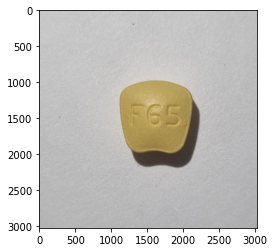

In [ ]:
plt.imshow(image_rgb)

In [ ]:
image = cv2.imread('/content/sample_data/╛╦╛р_┬∙╣╠/3/3_15.jpg')

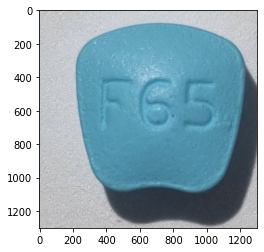

In [ ]:
image_crop = image[900:2200,900:2200]

plt.imshow(image_crop, cmap = 'gray')
plt.show()

In [ ]:
# 사각형 좌표: 시작점의 x,y, ?, 너비
rectangle = (300,1000,300,1500)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabcut에 사용할 임시 배열 생성
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# grabcut 실행
cv2.grabCut(image_rgb, 
            mask,
            rectangle,
            bgdModel,  # 배경을 위한 임시 배열
            fgdModel,  # 전경을 위한 임시 배열
            5,         # 반복횟수
            cv2.GC_INIT_WITH_RECT)  # 사각형을 위한 초기화

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[2.08200358e-01, 5.46209031e-02, 2.79212508e-02, 6.66467860e-01,
         4.27896274e-02, 1.98313188e+02, 1.96238079e+02, 1.95365955e+02,
         1.68856404e+02, 1.44250426e+02, 7.88156661e+01, 7.67296810e+01,
         6.70426471e+01, 5.86450801e+01, 1.89129578e+02, 1.89129578e+02,
         1.89521499e+02, 1.90913730e+02, 1.68123521e+02, 1.03991656e+02,
         8.93845697e+01, 8.74373769e+01, 8.04935409e+01, 8.74373769e+01,
         8.71097686e+01, 8.08684724e+01, 8.04935409e+01, 8.08684724e+01,
         7.81161890e+01, 1.02423205e+02, 9.63631151e+01, 6.01502224e+01,
         9.63631151e+01, 9.29628111e+01, 6.12229921e+01, 6.01502224e+01,
         6.12229921e+01, 5.34663904e+01, 4.65590380e+02, 4.80309890e+02,
         4.76487214e+02, 4.80309890e+02, 5.0

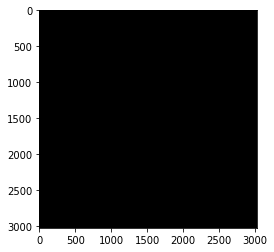

In [ ]:
# 배경인 곳은 0, 아닌 곳은 1로 설정한 마스크 생성
mask_2 = np.where((mask == 2) | (mask == 0), 0,1).astype('uint8')

# 이미지에 새로운 마스크를 곱해 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:,:, np.newaxis]

plt.imshow(image_rgb_nobg)
plt.show()

In [ ]:
BLUR = 21
CANNY_THRESH_1 = 18
CANNY_THRESH_2 = 18
MASK_DILATE_ITER = 4
MASK_ERODE_ITER = 4
MASK_COLOR = (0,0,1.0) # In BGR format
 
 
img = cv2.imread('/content/sample_data/╛╦╛р_┬∙╣╠/3/3_15.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)
 
contour_info = []
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
 
for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
 
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]
 
mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))
 
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3)
 
mask_stack  = mask_stack.astype('float32') / 255.0
img         = img.astype('float32') / 255.0
 
masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR)
masked = (masked * 255).astype('uint8')
 
dst = cv2.resize(masked, dsize=(3000, 3000), interpolation=cv2.INTER_AREA)

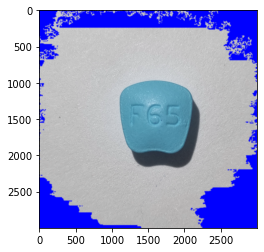

In [ ]:
plt.imshow(dst)

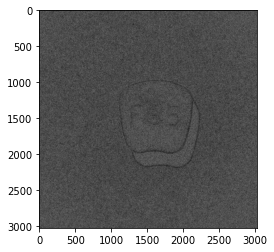

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/content/sample_data/╛╦╛р_┬∙╣╠/3/3_15.jpg', cv2.IMREAD_GRAYSCALE)
edges = cv.Canny(img,1,1)
plt.imshow(edges,  cmap = 'gray')